In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import psycopg2
import re
import sys
from itertools import islice

In [3]:
def connectToDb():
    return psycopg2.connect(database='ml_mini', user='igor', host='localhost', password='12345')

In [4]:
def createTable():
    con = connectToDb()
    cursor = con.cursor()
    
    try:
        cursor.execute('create table auto_clean(id serial2 primary key)')
        con.commit()
    except Exception as err:
        print('table no create!!!')
        print(err)
    finally:
        con.close()
        print('table create')

In [44]:
createTable()

table create


In [45]:
# add columns to table
with open('auto_clean.csv', 'r') as text:
    datatype = {0: 'int', 1: 'int', 2: 'varchar(15)', 3: 'varchar(5)', 4: 'varchar(4)',
                5: 'varchar(11)', 6: 'varchar(3)', 7: 'varchar(5)', 8: 'float8',
                9: 'numeric(18, 17)', 10: 'numeric(18, 17)', 11: 'float8', 12: 'int2',
               13: 'varchar(5)', 14: 'varchar(6)', 15: 'int2', 16: 'varchar(4)', 
               17: 'numeric(18, 17)', 18: 'float8', 19: 'float8', 20: 'float8', 
               21: 'numeric(17, 13)', 22: 'int2', 23: 'int2', 24: 'float8', 
               25: 'numeric(18, 16)', 26: 'varchar(6)', 27: 'int2', 28: 'int2'}
    namesColumns = text.readline()
    namesColumns = namesColumns.strip('\n').split(',')
    namesColumns = [re.sub('[-, /]', '_', v) for v in namesColumns]
    
    for i, colName in enumerate(namesColumns):
        con = connectToDb()
        cursor = con.cursor()
        
        try:
            cursor.execute('alter table auto_clean add column '+colName+' '+datatype[i])
            con.commit()
        except Exception as err:
            print('No add column №', i, colName)
            print(err)
        finally:
            con.close()
    
    del datatype

In [4]:
# заполнить таблицу строками, для быстроты и оптимальности заполнять блоками по 10 строк

def fillingTheTable():
    indexLine = 1
    openFile = open('auto_clean.csv', 'r')
    for line in islice(openFile, 1, None):
        dataLine = line.strip('\n').split(',')
        dataLine = [None if v == '' else v for v in dataLine]
        
        query = 'insert into auto_clean('+namesColumns[0]+', '+namesColumns[1]+', '+namesColumns[2]+', '+namesColumns[3]+', '+namesColumns[4]+', '+namesColumns[5]+', '+namesColumns[6]+', '+namesColumns[7]+', '+namesColumns[8]+', '+namesColumns[9]+', '+namesColumns[10]+', '+namesColumns[11]+', '+namesColumns[12]+', '+namesColumns[13]+', '+namesColumns[14]+', '+namesColumns[15]+', '+namesColumns[16]+', '+namesColumns[17]+', '+namesColumns[18]+', '+namesColumns[19]+', '+namesColumns[20]+', '+namesColumns[21]+', '+namesColumns[22]+', '+namesColumns[23]+', '+namesColumns[24]+', '+namesColumns[25]+', '+namesColumns[26]+', '+namesColumns[27]+', '+namesColumns[28]+') values(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'
        con = connectToDb()
        cursor = con.cursor()
        cursor.execute(query, dataLine)
        con.commit()
        con.close()
        
        indexLine += 1
        
    openFile.close()

In [47]:
fillingTheTable()

In [5]:
con = connectToDb()
cursor = con.cursor()

sql = 'select * from auto_clean'

df_temp = pd.read_sql(sql, con)
con.close()

In [6]:
df_temp.head()

,id,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_l_100km,horsepower_binned,diesel,gas
0,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,4,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,5,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
#-------------------------------------------------------------

In [5]:
df = pd.read_csv('auto_clean.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [7]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
df.shape

(201, 29)

In [9]:
df.iloc[:1, 10:13]

,width,height,curb-weight
0,0.890278,48.8,2548


In [10]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [11]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [12]:
df.describe(include=['object']) # freg - частотность

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [13]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [14]:
df.corr()['symboling']

symboling            1.000000
normalized-losses    0.466264
wheel-base          -0.535987
length              -0.365404
width               -0.242423
height              -0.550160
curb-weight         -0.233118
engine-size         -0.110581
bore                -0.140019
stroke              -0.008245
compression-ratio   -0.182196
horsepower           0.075819
peak-rpm             0.279740
city-mpg            -0.035527
highway-mpg          0.036233
price               -0.082391
city-L/100km         0.066171
diesel              -0.196735
gas                  0.196735
Name: symboling, dtype: float64

In [15]:
corField = []
for i in df.corr():
    for j in df.corr().index[df.corr()[i] > 0.7]:
        if i != j and j not in corField and i not in corField:
            corField.append(j)
            print(i, j, df.corr()[i][df.corr().index == j].values[0])

wheel-base length 0.8760238919618017
wheel-base width 0.8145066522681041
wheel-base curb-weight 0.7820972444156647
engine-size horsepower 0.8226756460813224
engine-size price 0.8723351674455199
engine-size city-L/100km 0.7450588874770473
compression-ratio diesel 0.9852311290083884
city-mpg highway-mpg 0.972043705896011


In [16]:
corField

['length',
 'width',
 'curb-weight',
 'horsepower',
 'price',
 'city-L/100km',
 'diesel',
 'highway-mpg']

In [17]:
corr = df[corField].corr()

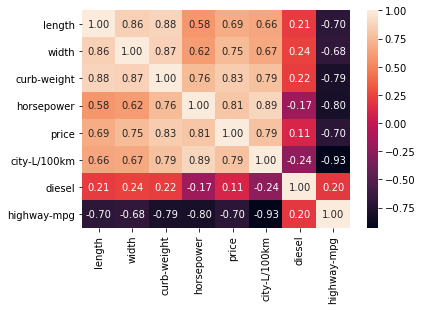

In [18]:
sns.heatmap(corr, annot=True, fmt='.2f')

In [19]:
df[corField].corr()

,length,width,curb-weight,horsepower,price,city-L/100km,diesel,highway-mpg
length,1.000000,0.857170,0.880665,0.579821,0.690628,0.657373,0.211187,-0.698142
width,0.857170,1.000000,0.866201,0.615077,0.751265,0.673363,0.244356,-0.680635
curb-weight,0.880665,0.866201,1.000000,0.757976,0.834415,0.785353,0.221046,-0.794889
horsepower,0.579821,0.615077,0.757976,1.000000,0.809575,0.889488,-0.169053,-0.804575
price,0.690628,0.751265,0.834415,0.809575,1.000000,0.789898,0.110326,-0.704692
city-L/100km,0.657373,0.673363,0.785353,0.889488,0.789898,1.000000,-0.241282,-0.930028
diesel,0.211187,0.244356,0.221046,-0.169053,0.110326,-0.241282,1.000000,0.198690
highway-mpg,-0.698142,-0.680635,-0.794889,-0.804575,-0.704692,-0.930028,0.198690,1.000000


(0.0, 53351.0396808004)

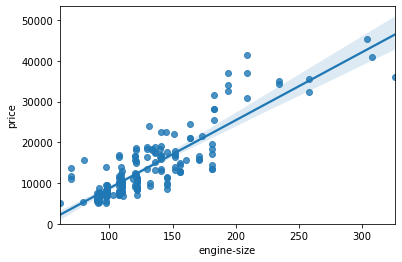

In [20]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

In [21]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


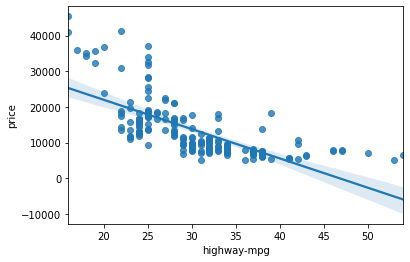

In [22]:
sns.regplot(x='highway-mpg', y='price', data=df)
# plt.ylim(0)

In [23]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


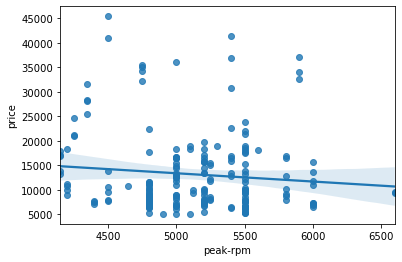

In [24]:
sns.regplot(x='peak-rpm', y='price', data=df)

In [25]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


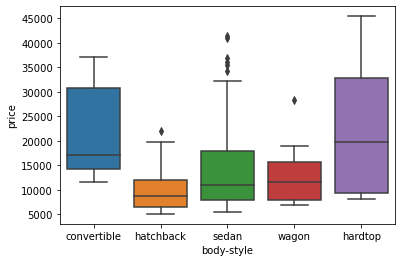

In [26]:
sns.boxplot(x='body-style', y='price', data=df)

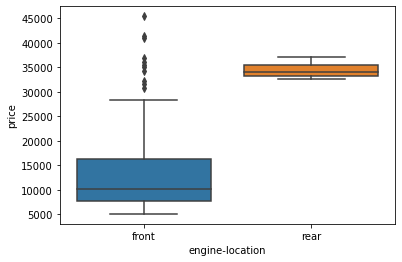

In [27]:
sns.boxplot(x='engine-location', y='price', data=df)

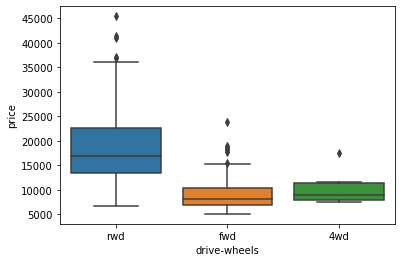

In [28]:
sns.boxplot(x='drive-wheels', y='price', data=df)

In [29]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [30]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [31]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [32]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [33]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


In [34]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [35]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [36]:
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [37]:
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [38]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [39]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [40]:
df_gptest2 = df[['body-style', 'price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'], as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


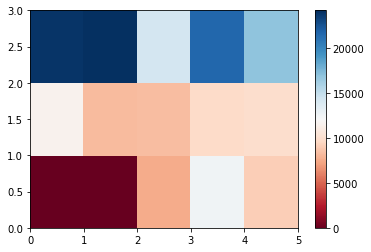

In [41]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

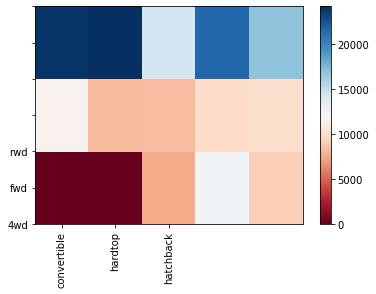

In [42]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_xticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [43]:
row_labels = grouped_pivot.columns.levels
row_labels1 = grouped_pivot.columns.levels[1]
row_labels, row_labels1, grouped_pivot.index, grouped_pivot.shape, grouped_pivot.index

(FrozenList([['price'], ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']]),
 Index(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], dtype='object', name='body-style'),
 Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels'),
 (3, 5),
 Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels'))

In [44]:
np.arange(grouped_pivot.shape[1]) + 0.5

array([0.5, 1.5, 2.5, 3.5, 4.5])

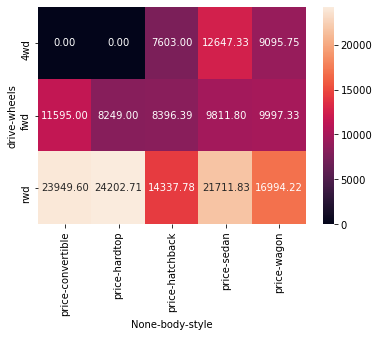

In [45]:
sns.heatmap(grouped_pivot, annot=True, fmt='.2f')
plt.show()

In [46]:
from scipy import stats

In [47]:
cols = ['wheel-base', 'horsepower', 'length', 'width', 'curb-weight', 
       'engine-size', 'bore', 'city-mpg', 'highway-mpg']

for col in cols:
    pearson_coef, p_value = stats.pearsonr(df[col], df['price'])
    print('PearsonR между {} и price {} с P-значением P = {}'.format(col, pearson_coef, p_value))
    
    if p_value < 0.001:
        print('Корреляция между  {} и price статистичести значимая'.format(col))
    elif p_value < 0.05:
        print('Корреяция между {} и price средняя'.format(col))
    elif p_value < 0.1:
        print('Коррекция между {} и price слабая'.format(col))
    else:
        print('Корреляция между {} и price незначительная'.format(col))
        
    if pearson_coef > 0:
        if pearson_coef > 0.85:
            print('Коэффициент ~{} показывает положитльную очень сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.75:
            print('Коэффициент ~{} показывает положительную достаточно сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.6:
            print('Коэффициент ~{} показывает положительную относительно сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.5:
            print('Коэффициент ~{} показывает положительную среднюю связь\n'.format(pearson_coef))
        else:
            print('Коэффициент ~{} показывает положительную слабую сязь\n'.format(pearson_coef))
    else:
        if abs(pearson_coef) > 0.85:
            print('Коэффициент ~{} показывает негативную очень сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.75:
            print('Коэффициент ~{} показывает негативную достаточно сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.6:
            print('Коэффициент ~{} показывает негативную относительно сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.5:
            print('Коэффициент ~{} показывает положительную среднюю связь\n'.format(pearson_coef))
        else:
            print('Коэффициент ~{} показывает положительную слабую сязь\n'.format(pearson_coef))
        
        

PearsonR между wheel-base и price 0.584641822265508 с P-значением P = 8.076488270733218e-20
Корреляция между  wheel-base и price статистичести значимая
Коэффициент ~0.584641822265508 показывает положительную среднюю связь

PearsonR между horsepower и price 0.8095745670036559 с P-значением P = 6.369057428260101e-48
Корреляция между  horsepower и price статистичести значимая
Коэффициент ~0.8095745670036559 показывает положительную достаточно сильную связь

PearsonR между length и price 0.6906283804483638 с P-значением P = 8.016477466159556e-30
Корреляция между  length и price статистичести значимая
Коэффициент ~0.6906283804483638 показывает положительную относительно сильную связь

PearsonR между width и price 0.7512653440522673 с P-значением P = 9.200335510481646e-38
Корреляция между  width и price статистичести значимая
Коэффициент ~0.7512653440522673 показывает положительную достаточно сильную связь

PearsonR между curb-weight и price 0.8344145257702843 с P-значением P = 2.18957723889

In [48]:
# самый ходовой критерий p_value < 5%

In [49]:
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [50]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [51]:
grouped_test2.get_group('4wd')['price'].to_frame()

,price
4,17450.0
136,7603.0
140,9233.0
141,11259.0
144,8013.0
145,11694.0
150,7898.0
151,8778.0


In [53]:
# f-test
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                             grouped_test2.get_group('rwd')['price'],
                             grouped_test2.get_group('4wd')['price'])
print('ANOVA results: F=', f_val, ', P=', p_val)

ANOVA results: F= 67.95406500780399 , P= 3.3945443577151245e-23


In [113]:
f_val, p_val =stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                            grouped_test2.get_group('rwd')['price'])
print('ANOVA results: F =', f_val, 'P =', p_val)

ANOVA results: F = 130.5533160959111 P = 2.2355306355677845e-23


In [114]:
f_val, p_val =stats.f_oneway(grouped_test2.get_group('4wd')['price'],
                            grouped_test2.get_group('rwd')['price'])
print('ANOVA results: F =', f_val, 'P =', p_val)

ANOVA results: F = 8.580681368924756 P = 0.004411492211225333


In [115]:
f_val, p_val =stats.f_oneway(grouped_test2.get_group('4wd')['price'],
                            grouped_test2.get_group('fwd')['price'])
print('ANOVA results: F =', f_val, 'P =', p_val)

ANOVA results: F = 0.665465750252303 P = 0.41620116697845666


- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore